In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
from sklearn.metrics import confusion_matrix


In [4]:
df = pd.read_csv('first_train_index_20180131.csv')
df

,id,type
0,696220,star
1,911466,star
2,915856,star
3,720026,star
4,1198160,star
...,...,...
483846,1317216,star
483847,713785,star
483848,766117,star
483849,688646,star


In [16]:
file = []
for i in range(len(os.listdir("first_train_data"))):
    file.append(eval(os.listdir("first_train_data")[i].strip(".txt")))

dfnew = df.loc[df["id"].isin(file)]
dfnew.to_csv("correct_index.csv", index=False)
dfnew.head()

,id,type
8,1003732,star
20,1012114,star
59,1010478,star
77,1013475,star
80,1001826,star


In [42]:
#we need to add spectrum data into a new csv according their correct index id and put it to new dataset
X = []
for i in dfnew["id"]:
    d = []
    files = open(r"C:/Users/Aida/BIT files/first_train_data/" + str(i) +".txt", "r")
    for j in files.readline().split(","):
        d.append(eval(j))
    X.append(d)
X = np.array(X)

df1 = pd.DataFrame(X)
df1["id"] = dfnew.id
df1.insert(0, "id", df1.pop("id"))

df1["type"] = dfnew["type"]
df1.to_csv("filtered_data.csv")

df1.head()

,id,0,1,2,3,4,5,6,7,8,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,type
0,NaN,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,...,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,NaN
1,NaN,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,...,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,NaN
2,NaN,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,...,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,NaN
3,NaN,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,...,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,NaN
4,NaN,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,...,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,NaN


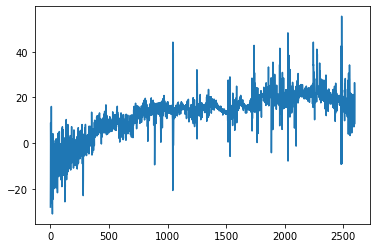

In [43]:
d = []
files = open("C:/Users/Aida/BIT files/first_train_data/1000000.txt", "r")
for i in files.readline().split(","):
    d.append(eval(i))

plt.plot(d)
plt.show()

now for the corrected dataset

In [45]:
df = pd.read_csv("filtered_data.csv")
df.head()

C:\Users\Aida\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2602) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,0,1,2,3,4,5,6,7,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,type
0,0,NaN,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,...,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,NaN
1,1,NaN,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,...,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,NaN
2,2,NaN,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,...,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,NaN
3,3,NaN,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,...,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,NaN
4,4,NaN,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,...,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,NaN


In [46]:
df = df.drop(["Unnamed: 0", "id", "type"], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
0,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,42.753681,...,64.180058,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096
1,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,333.472957,...,463.628318,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102
2,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,919.115600,...,479.905961,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780
3,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,140.674932,...,2124.095762,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660
4,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,8.963254,...,8.829281,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,56.634618,17.767603,32.697765,102.653269,86.900047,-7.775973,53.095181,94.180916,-47.081932,32.818301,...,335.269864,330.418627,326.793333,321.688509,304.854811,292.384946,298.564089,303.588999,298.312277,304.220174
9996,135.789058,174.621573,187.832099,202.452037,196.802113,234.001058,205.252376,179.944856,145.471086,191.867945,...,83.703287,78.612264,82.259806,83.874910,83.422134,81.554595,85.621103,85.185739,80.110783,94.154790
9997,244.418307,321.622381,297.454014,335.700003,298.094204,306.042112,375.882266,306.347536,356.232424,320.717665,...,119.858559,110.699663,109.368864,115.441900,125.251659,120.673072,118.692345,115.199357,115.444263,119.704294
9998,375.362477,240.881277,164.797330,216.840804,345.062354,211.341449,251.472212,-125.765719,195.138919,254.692949,...,225.020414,227.126399,213.293893,213.912408,199.233762,185.039440,162.756722,151.156361,184.163020,217.002746


In [48]:
dfnew = pd.read_csv("correct_index.csv")
dfnew

,id,type
0,1003732,star
1,1012114,star
2,1010478,star
3,1013475,star
4,1001826,star
...,...,...
9995,1011166,star
9996,1011003,star
9997,1006484,star
9998,1010239,star


In [50]:
#let's equalize them
df["id"] = dfnew["id"]
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,id
0,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,42.753681,...,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,1003732
1,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,333.472957,...,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,1012114
2,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,919.115600,...,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,1010478
3,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,140.674932,...,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,1013475
4,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,8.963254,...,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,1001826
5,13.332569,11.753398,-8.483814,19.541529,6.735845,14.887184,4.114569,8.087817,16.045923,9.688625,...,127.535282,127.992023,131.171180,129.048552,122.147329,118.392666,117.625249,120.435792,130.043564,1009352
6,195.097925,170.802714,214.074985,235.426298,203.474028,225.753422,237.192210,153.110350,192.877702,173.588217,...,170.679201,170.847441,166.915375,167.287951,165.623210,159.093652,161.415195,167.469554,165.071187,1002119
7,131.778964,102.044295,137.822866,153.061205,130.819393,122.643173,127.467978,103.695964,73.855120,48.410693,...,109.761635,106.639443,107.551580,103.328157,99.543652,98.286474,102.447471,106.421916,105.347656,1012145
8,420.828624,616.340761,24.531266,358.582892,226.315032,-71.464159,87.253990,293.675830,330.326228,349.554228,...,43.382511,37.227539,30.304068,15.283952,21.252105,46.727856,47.765440,36.080303,33.050362,1005050
9,-22.241258,49.649909,28.380738,-26.223556,-6.589805,-14.920251,40.295049,-38.219867,-29.973817,-23.541849,...,80.044756,83.523686,82.088314,79.057913,82.144016,82.116324,79.859718,79.452451,72.382202,1003591


In [55]:
df.insert(0, "id", df.pop("id"))
df

,id,0,1,2,3,4,5,6,7,8,...,2592,2593,2594,2595,2596,2597,2598,2599,type,type_category
0,1003732,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,...,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,star,2
1,1012114,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,...,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,star,2
2,1010478,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,...,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,star,2
3,1013475,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,...,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,star,2
4,1001826,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,...,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,star,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1011166,56.634618,17.767603,32.697765,102.653269,86.900047,-7.775973,53.095181,94.180916,-47.081932,...,326.793333,321.688509,304.854811,292.384946,298.564089,303.588999,298.312277,304.220174,star,2
9996,1011003,135.789058,174.621573,187.832099,202.452037,196.802113,234.001058,205.252376,179.944856,145.471086,...,82.259806,83.874910,83.422134,81.554595,85.621103,85.185739,80.110783,94.154790,star,2
9997,1006484,244.418307,321.622381,297.454014,335.700003,298.094204,306.042112,375.882266,306.347536,356.232424,...,109.368864,115.441900,125.251659,120.673072,118.692345,115.199357,115.444263,119.704294,star,2
9998,1010239,375.362477,240.881277,164.797330,216.840804,345.062354,211.341449,251.472212,-125.765719,195.138919,...,213.293893,213.912408,199.233762,185.039440,162.756722,151.156361,184.163020,217.002746,star,2


## now to categorize the data

In [56]:
df["type"] = dfnew["type"].astype("category")
df.dtypes


id                  int64
0                 float64
1                 float64
2                 float64
3                 float64
                   ...   
2597              float64
2598              float64
2599              float64
type             category
type_category        int8
Length: 2603, dtype: object

In [ ]:
df1["type"].unique()
#how many categories do we have here

In [57]:
df["type_category"] = df["type"].cat.codes
df

,id,0,1,2,3,4,5,6,7,8,...,2592,2593,2594,2595,2596,2597,2598,2599,type,type_category
0,1003732,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,...,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,star,2
1,1012114,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,...,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,star,2
2,1010478,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,...,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,star,2
3,1013475,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,...,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,star,2
4,1001826,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,...,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,star,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1011166,56.634618,17.767603,32.697765,102.653269,86.900047,-7.775973,53.095181,94.180916,-47.081932,...,326.793333,321.688509,304.854811,292.384946,298.564089,303.588999,298.312277,304.220174,star,2
9996,1011003,135.789058,174.621573,187.832099,202.452037,196.802113,234.001058,205.252376,179.944856,145.471086,...,82.259806,83.874910,83.422134,81.554595,85.621103,85.185739,80.110783,94.154790,star,2
9997,1006484,244.418307,321.622381,297.454014,335.700003,298.094204,306.042112,375.882266,306.347536,356.232424,...,109.368864,115.441900,125.251659,120.673072,118.692345,115.199357,115.444263,119.704294,star,2
9998,1010239,375.362477,240.881277,164.797330,216.840804,345.062354,211.341449,251.472212,-125.765719,195.138919,...,213.293893,213.912408,199.233762,185.039440,162.756722,151.156361,184.163020,217.002746,star,2


In [63]:
df.to_csv("filtered_data.csv")  

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score

In [ ]:
pip uninstall tensorflow


In [ ]:
pip uninstall protobuf

In [ ]:
pip install tensorflow

In [ ]:
dataset = pd.read_csv("filtered_data.csv")
dataset.head()

In [ ]:
X = data.drop(["Unnamed: 0", "id", "type", "type_category"], axis=1)
Y = data["type_category"]

print("Shape of input data: ", X.shape)
print("Shape of output data: ", Y.shape)

X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.20, shuffle=True)
print("Shape of X_train data: ", X_train.shape)
print("Shape of X_test data: ", X_test.shape)
print("Shape of y_train data: ", y_train.shape)
print("Shape of y_test data: ", y_test.shape)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1028, activation="relu", input_shape=[X_train.shape[1]]),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(4, activation="softmax")

])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = opt,
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])


In [ ]:
model.save("model")


In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('ANN classification model training on LAMOST Data', fontsize=15)
f.subplots_adjust(top=0.9, wspace=0.2)

epochs = range(1, len(history.history["accuracy"])+1)
ax1.plot(epochs, history.history['accuracy'], label='Train')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
ax1.set_yticks(np.arange(start=0.5, stop=1.05, step=0.1))
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train')
ax2.plot(epochs, history.history['val_loss'], label='Validation')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Sparse Categorical Crossentropy Loss')
l2 = ax2.legend(loc="best")

plt.savefig("analysis.png")


now let's see what confusion matrix will be on test dataset

In [ ]:
p = model.predict(X_test)
# predicted labels in a 1D list
p_r = []

for i in range(p.shape[0]):
    p_r.append(np.where(p[i] == np.max(p[i]))[0][0])
confusion_matrix(y_test, p_r)

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cm, index=["Galaxy", "QSO", "Star", "Unknown"], columns=["Galaxy", "QSO", "Star", "Unknown"])
    sn.set(font_scale=1.4) 
    sn.heatmap(df_dm, annot=True, annot_kws={"size": 1})
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.show()

print_confusion_matrix(y_test, p_r)

In [ ]:
f1_score(y_test, p_r, average=None)

# now for another dataset
## so we do the same as we did to train 

In [ ]:
f = pd.read_csv("first_test_index_20180131.csv")
f.head()

In [ ]:
file_name = []
for i in range(len(os.listdir("first_test_data"))):
    file_name.append(eval(os.listdir("first_test_data")[i].strip(".txt")))

f1 = df4.loc[df4["id"].isin(file_name)]
f1.to_csv("test_correct_index.csv", index=False)
f1.head()

In [ ]:
X = []
for i in f1["id"]:
    d = []
    files = open(r"C:/Users/Aida/BIT files/first_test_data/" + str(i) +".txt", "r")
    for j in files.readline().split(","):
        d.append(eval(j))
    X.append(d)
X = np.array(X)

f2 = pd.DataFrame(X)
f2.to_csv("test_filtered_data.csv")

f2.head()

In [ ]:
f2["id"] = f1[["id"]].to_numpy()
f2.insert(0, "id", f2.pop("id"))
f2.to_csv("test_filtered_data.csv")

In [ ]:
test_df = pd.read_csv("test_filtered_data.csv")
X = test_df.drop(["Unnamed: 0", "id"], axis=1)
test_df.head(10)

In [ ]:
predicted = model.predict(X)
pred_label = []
for i in range(predicted.shape[0]):
    pred_label.append(np.where(predicted[i] == np.max(predicted[i]))[0][0])

In [ ]:
test_pred = []
for i in pred_label:
    if i == 0:
        test_pred.append("Galaxy")
    elif i == 1:
        test_pred.append("QSO")
    elif i == 2:
        test_pred.append("Star")
    elif i == 3:
        test_pred.append("Unknown")

final_df = pd.DataFrame(test_pred, columns=["Predicted Type"])
final_df["id"] = test_df[["id"]].to_numpy()
final_df.insert(0, "id", final_df.pop("id"))
final_df.head(5)

In [ ]:
test_final_df.to_csv("test_final.csv", index=False)